<a href="https://colab.research.google.com/github/Kishore261/Bike-sharing-demand-EDA/blob/main/BIKE_SHARING_DEMANDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df=pd.read_csv('/content/743dc2f8-d165-4c73-b582-c4b58f68817e-bike.csv')

1.Data Understanding

In [46]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [47]:
df.shape

(730, 16)

In [48]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [49]:
df['season'].unique(),df['season'].dtypes

(array([1, 2, 3, 4]), dtype('int64'))

In [50]:
df['weathersit'].unique(),df['weathersit'].dtypes

(array([2, 1, 3]), dtype('int64'))

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [52]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


2.DATA CLEANING

In [53]:
df1=df.drop(['instant','casual','registered'],axis=1)

In [54]:
df1.shape

(730, 13)

In [55]:
df1['weathersit']=df1['weathersit'].map({1:'Clear',2:'Mist',3:'Light Rain',4:'Heavy Rain'})

In [56]:
df1['season']=df1['season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [57]:
df1['weekday']=df1['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

In [58]:
df1['mnth']=df1['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',5:'May',6:'June',7:'July',
                             8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})

In [59]:
df1.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,Spring,0,Jan,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,Spring,0,Jan,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [60]:
df1.tail()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
725,27-12-2019,Spring,1,Dec,0,Thursday,1,Mist,10.420847,11.33210,65.2917,23.458911,2114
726,28-12-2019,Spring,1,Dec,0,Friday,1,Mist,10.386653,12.75230,59.0000,10.416557,3095
727,29-12-2019,Spring,1,Dec,0,Saturday,0,Mist,10.386653,12.12000,75.2917,8.333661,1341
728,30-12-2019,Spring,1,Dec,0,Sunday,0,Clear,10.489153,11.58500,48.3333,23.500518,1796
729,31-12-2019,Spring,1,Dec,0,Monday,1,Mist,8.849153,11.17435,57.7500,10.374682,2729


In [61]:
df1.isnull().sum().sum()

np.int64(0)

In [62]:
df1['dteday']=pd.to_datetime(df1['dteday'],dayfirst='2018-01-01')

In [63]:
df1

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,Spring,0,Jan,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,2018-01-02,Spring,0,Jan,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,2018-01-03,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,2018-01-04,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,2018-01-05,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,Spring,1,Dec,0,Thursday,1,Mist,10.420847,11.33210,65.2917,23.458911,2114
726,2019-12-28,Spring,1,Dec,0,Friday,1,Mist,10.386653,12.75230,59.0000,10.416557,3095
727,2019-12-29,Spring,1,Dec,0,Saturday,0,Mist,10.386653,12.12000,75.2917,8.333661,1341
728,2019-12-30,Spring,1,Dec,0,Sunday,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


In [64]:
roundoff_col=['temp','atemp','hum','windspeed']

In [65]:
df1[roundoff_col]=df1[roundoff_col].apply(lambda x:round(x))

In [66]:
df1.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,Spring,0,Jan,0,Saturday,0,Mist,14.0,18.0,81.0,11.0,985
1,2018-01-02,Spring,0,Jan,0,Sunday,0,Mist,15.0,18.0,70.0,17.0,801
2,2018-01-03,Spring,0,Jan,0,Monday,1,Clear,8.0,9.0,44.0,17.0,1349
3,2018-01-04,Spring,0,Jan,0,Tuesday,1,Clear,8.0,11.0,59.0,11.0,1562
4,2018-01-05,Spring,0,Jan,0,Wednesday,1,Clear,9.0,11.0,44.0,13.0,1600


In [67]:
numeric_col=df1[['temp','atemp','hum','windspeed']]
numeric_col.head()

,temp,atemp,hum,windspeed
0,14.0,18.0,81.0,11.0
1,15.0,18.0,70.0,17.0
2,8.0,9.0,44.0,17.0
3,8.0,11.0,59.0,11.0
4,9.0,11.0,44.0,13.0


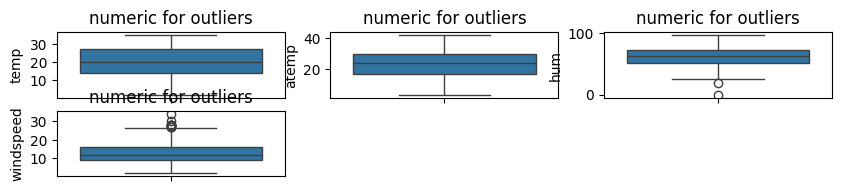

In [68]:
plt.figure(figsize=(10,8))
for i in range(len(numeric_col.columns)):
  plt.subplot(8,3,i+1)
  sns.boxplot(y=numeric_col.columns[i],data=numeric_col)
  plt.title('numeric for outliers')
plt.show()


In [69]:
df1['windspeed'].describe()

,windspeed
count,730.000000
mean,12.768493
std,5.194420
min,2.000000
25%,9.000000
50%,12.000000
75%,16.000000
max,34.000000


In [70]:
print("AT 80% Windspeed is:",df1['windspeed'].quantile(0.80))
print("AT 85% Windspeed is:",df1['windspeed'].quantile(0.85))
print("AT 90% Windspeed is:",df1['windspeed'].quantile(0.90))
print("AT 95% Windspeed is:",df1['windspeed'].quantile(0.95))
print("AT 99% Windspeed is:",df1['windspeed'].quantile(0.99))
print("AT 100% Windspeed is:",df1['windspeed'].quantile(1.00))

AT 80% Windspeed is: 17.0
AT 85% Windspeed is: 18.0
AT 90% Windspeed is: 20.0
AT 95% Windspeed is: 23.0
AT 99% Windspeed is: 27.0
AT 100% Windspeed is: 34.0


In [71]:
df1=df1[df1['windspeed']<23]

In [72]:
df1['hum'].describe()

,hum
count,686.000000
mean,63.088921
std,13.847215
min,0.000000
25%,53.000000
50%,63.000000
75%,73.000000
max,97.000000


In [73]:
print("AT 10% OF HUMIDITY IS:",df1['hum'].quantile(0.10))
print("AT 5% OF HUMIDITY IS:",df1['hum'].quantile(0.05))
print("AT 1% OF HUMIDITY IS:",df1['hum'].quantile(0.01))
print("AT 0.5% OF HUMIDITY IS:",df1['hum'].quantile(0.005))
print("AT 0% OF HUMIDITY IS:",df1['hum'].quantile(0.0))

AT 10% OF HUMIDITY IS: 46.0
AT 5% OF HUMIDITY IS: 42.0
AT 1% OF HUMIDITY IS: 31.0
AT 0.5% OF HUMIDITY IS: 29.425
AT 0% OF HUMIDITY IS: 0.0


In [74]:
df1=df1[df1['hum']>31]

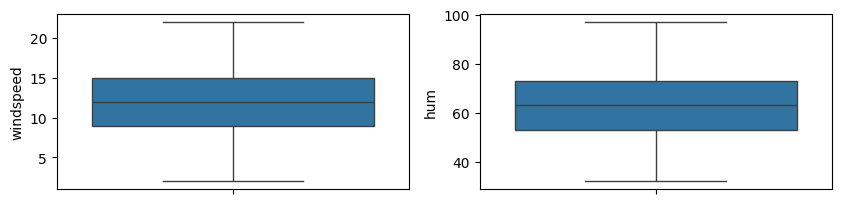

In [75]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.boxplot(y='windspeed',data=df1)
plt.subplot(2,2,2)
sns.boxplot(y='hum',data=df1)
plt.show()

In [76]:
df1.shape

(677, 13)

In [77]:
df1['day']=df1['dteday'].dt.day

In [78]:
df1.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,2018-01-01,Spring,0,Jan,0,Saturday,0,Mist,14.0,18.0,81.0,11.0,985,1
1,2018-01-02,Spring,0,Jan,0,Sunday,0,Mist,15.0,18.0,70.0,17.0,801,2
2,2018-01-03,Spring,0,Jan,0,Monday,1,Clear,8.0,9.0,44.0,17.0,1349,3
3,2018-01-04,Spring,0,Jan,0,Tuesday,1,Clear,8.0,11.0,59.0,11.0,1562,4
4,2018-01-05,Spring,0,Jan,0,Wednesday,1,Clear,9.0,11.0,44.0,13.0,1600,5


In [79]:
print(df1)

        dteday  season  yr mnth  holiday    weekday  workingday  weathersit  \
0   2018-01-01  Spring   0  Jan        0   Saturday           0        Mist   
1   2018-01-02  Spring   0  Jan        0     Sunday           0        Mist   
2   2018-01-03  Spring   0  Jan        0     Monday           1       Clear   
3   2018-01-04  Spring   0  Jan        0    Tuesday           1       Clear   
4   2018-01-05  Spring   0  Jan        0  Wednesday           1       Clear   
..         ...     ...  ..  ...      ...        ...         ...         ...   
723 2019-12-25  Spring   1  Dec        1    Tuesday           0        Mist   
724 2019-12-26  Spring   1  Dec        0  Wednesday           1  Light Rain   
726 2019-12-28  Spring   1  Dec        0     Friday           1        Mist   
727 2019-12-29  Spring   1  Dec        0   Saturday           0        Mist   
729 2019-12-31  Spring   1  Dec        0     Monday           1        Mist   

     temp  atemp   hum  windspeed   cnt  day  
0   

In [80]:
df1['day']=pd.cut(x=df1['day'],bins=[0,10,20,31],labels=['early','mid','late'])

In [82]:
df1['day'].head(10)

,day
0,early
1,early
2,early
3,early
4,early
5,early
6,early
7,early
9,early
10,mid


In [83]:
df1.isnull().sum()

,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0


3.EXPLORITORY DATA ANALYSIS(EDA)

/tmp/ipython-input-1022714252.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['cnt'])


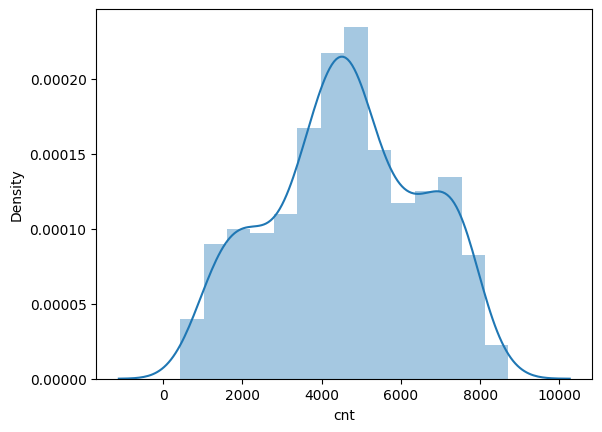

In [86]:
sns.distplot(df1['cnt'])
plt.show()

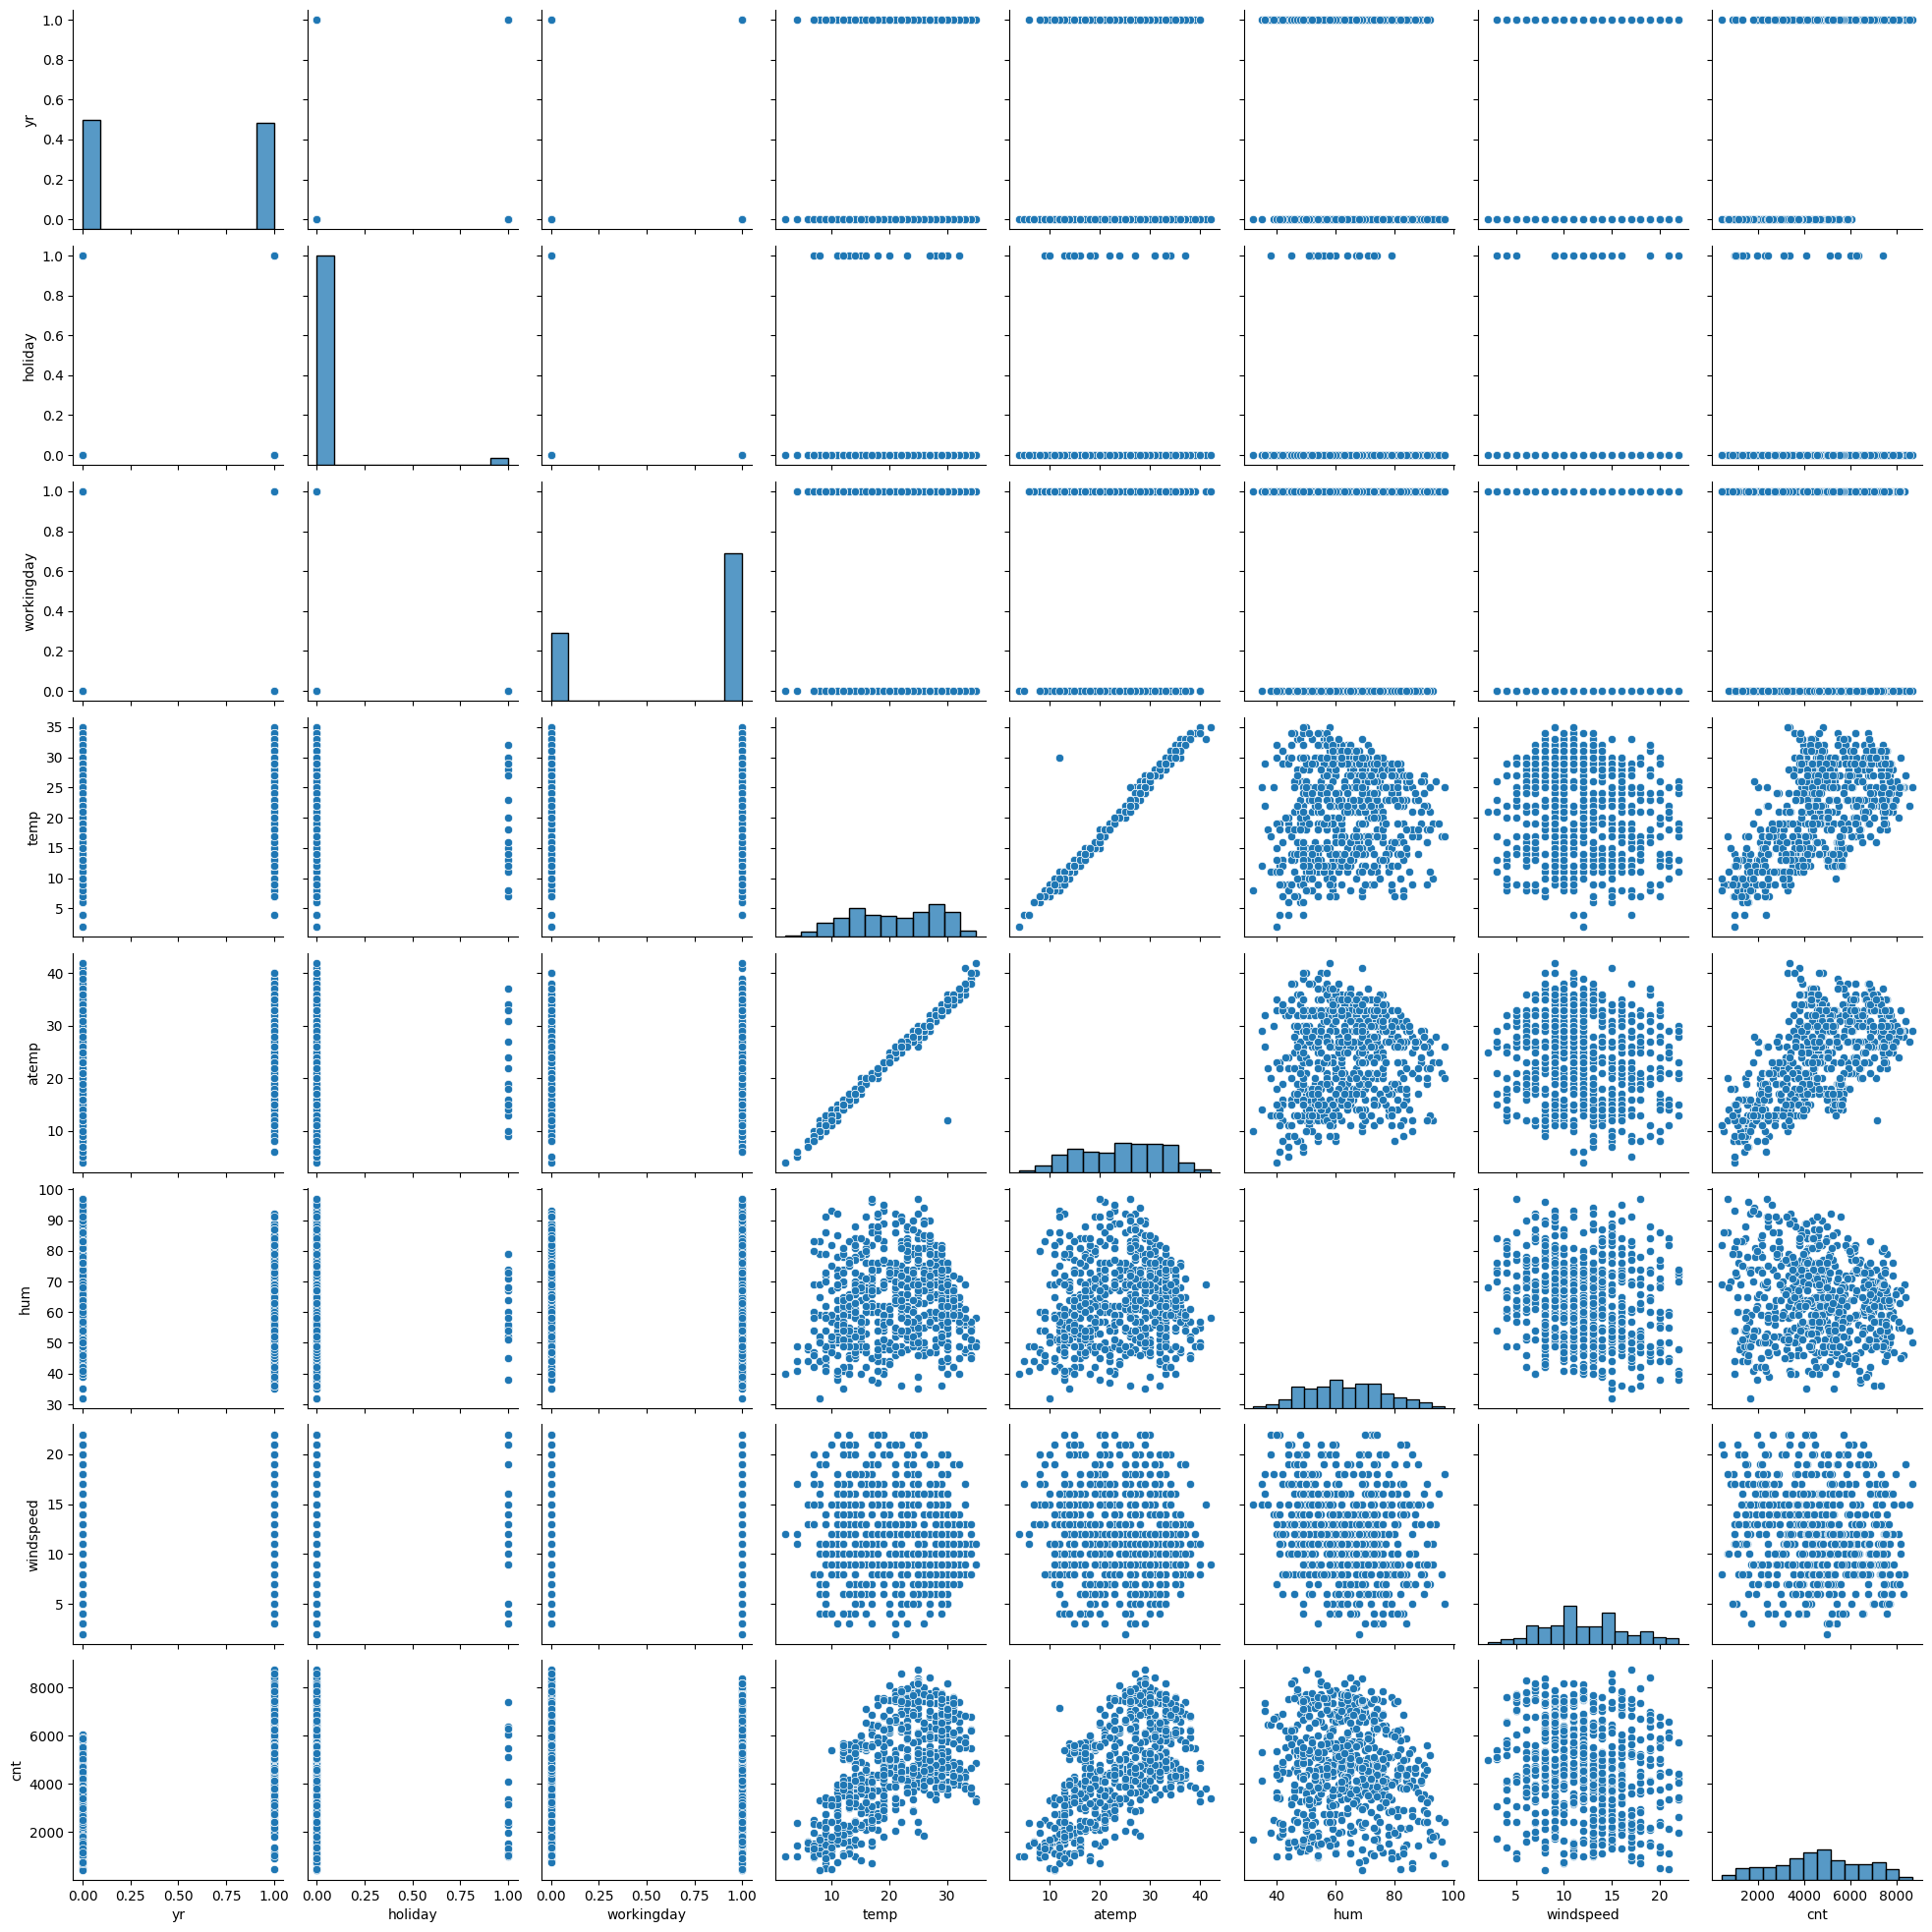

In [87]:
sns.pairplot(df1)
plt.show()

In [88]:
df1.dtypes

,0
dteday,datetime64[ns]
season,object
yr,int64
mnth,object
holiday,int64
weekday,object
workingday,int64
weathersit,object
temp,float64
atemp,float64


In [95]:
numericalcolu=df1.select_dtypes(include={'float64','int64'})

In [96]:
print(numericalcolu.columns)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt'],
      dtype='object')


In [99]:
correlation=numericalcolu.corr()

In [100]:
print(correlation)

                  yr   holiday  workingday      temp     atemp       hum  \
yr          1.000000  0.010371   -0.000676  0.061227  0.063099 -0.112628   
holiday     0.010371  1.000000   -0.263173 -0.040615 -0.041156 -0.029154   
workingday -0.000676 -0.263173    1.000000  0.050643  0.046638  0.033010   
temp        0.061227 -0.040615    0.050643  1.000000  0.990158  0.092772   
atemp       0.063099 -0.041156    0.046638  0.990158  1.000000  0.102475   
hum        -0.112628 -0.029154    0.033010  0.092772  0.102475  1.000000   
windspeed  -0.047299  0.042949   -0.012798 -0.095184 -0.117232 -0.210976   
cnt         0.596902 -0.083106    0.045670  0.622163  0.626040 -0.131351   

            windspeed       cnt  
yr          -0.047299  0.596902  
holiday      0.042949 -0.083106  
workingday  -0.012798  0.045670  
temp        -0.095184  0.622163  
atemp       -0.117232  0.626040  
hum         -0.210976 -0.131351  
windspeed    1.000000 -0.155379  
cnt         -0.155379  1.000000  


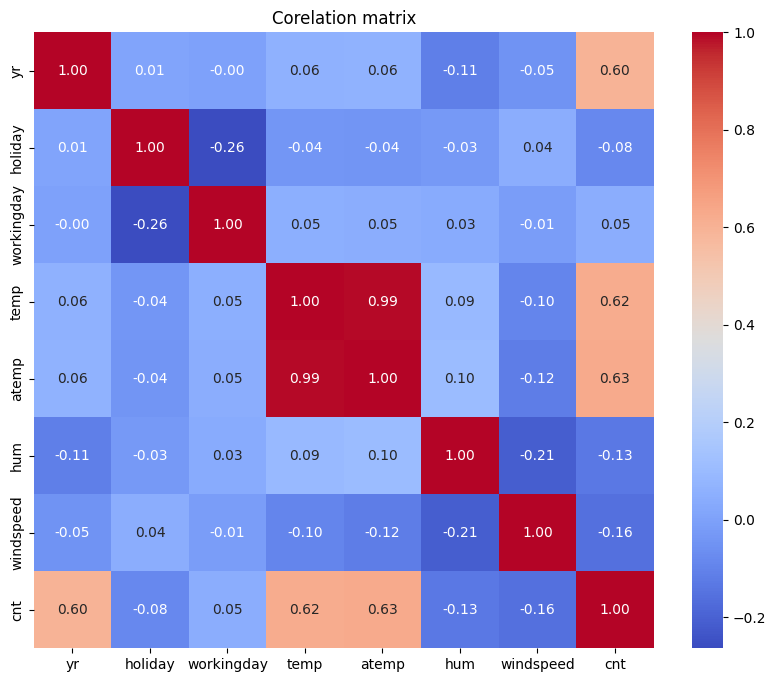

In [103]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,fmt='.2f',cmap='coolwarm',linecolor='black')
plt.title('Corelation matrix')
plt.show()

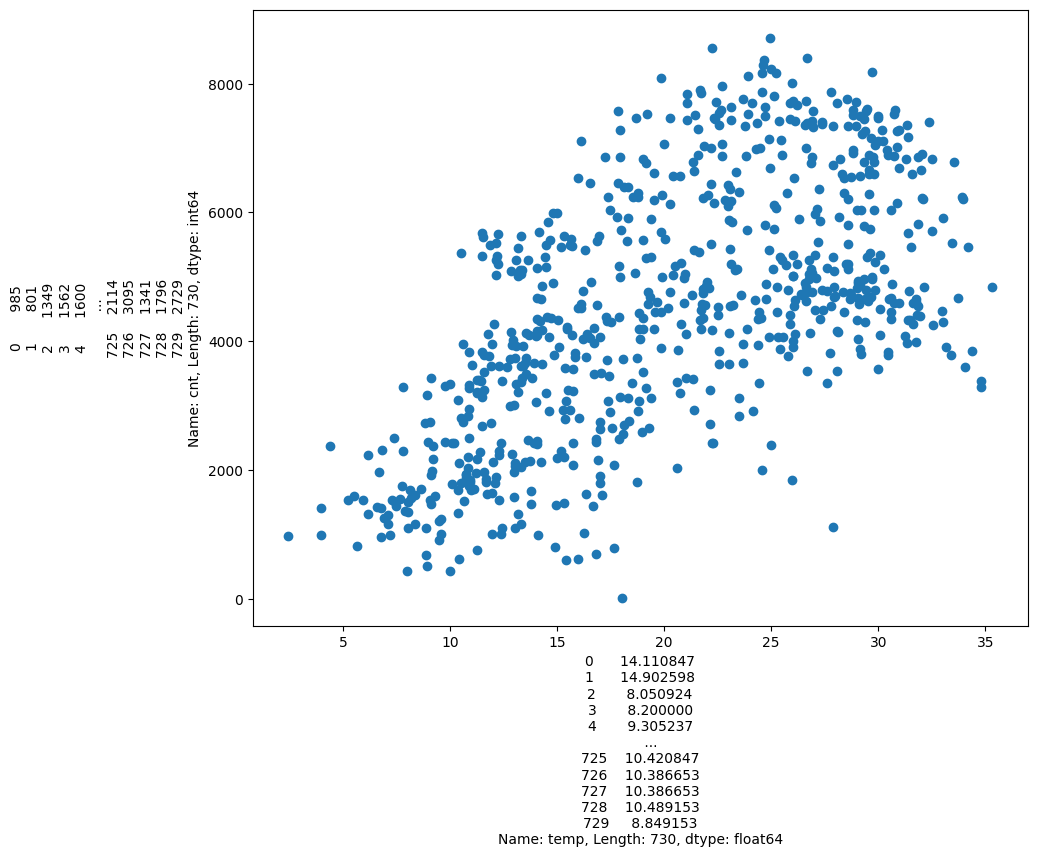

In [108]:
plt.figure(figsize=(10,8))
plt.scatter(df['temp'],df['cnt'])
plt.xlabel(df['temp'])
plt.ylabel(df['cnt'])
plt.show()

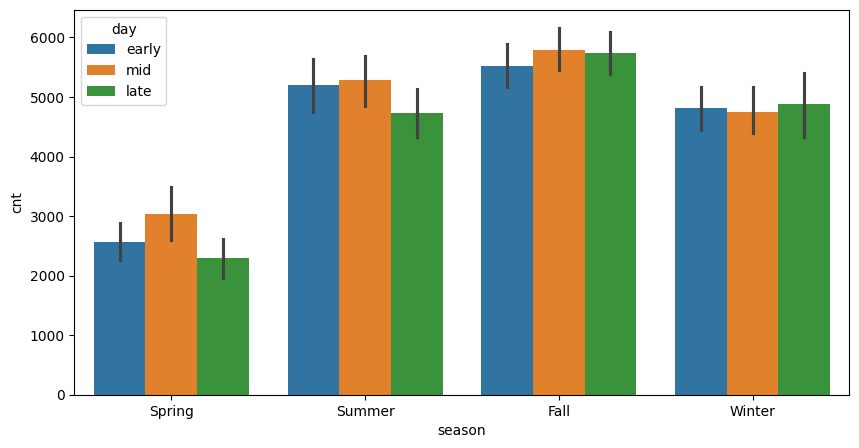

In [109]:
plt.figure(figsize=(10,5))
sns.barplot(x='season',y='cnt',hue='day',data=df1)
plt.show()

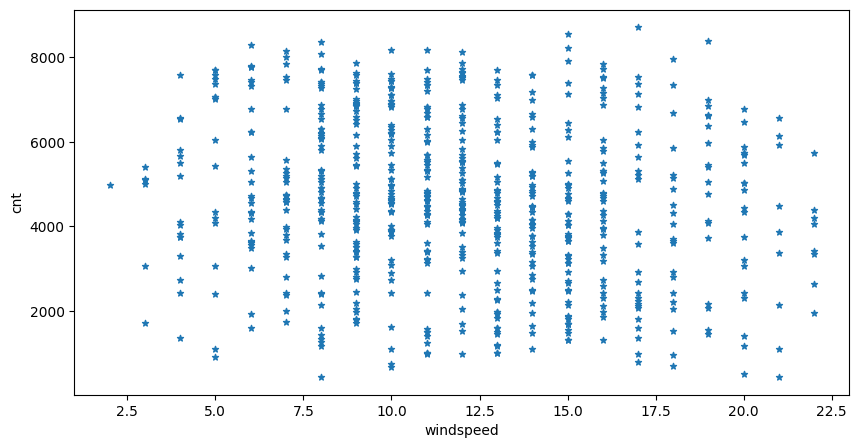

In [112]:
df1.plot(kind="scatter",marker='*',x='windspeed',y='cnt',figsize=(10,5))
plt.show()

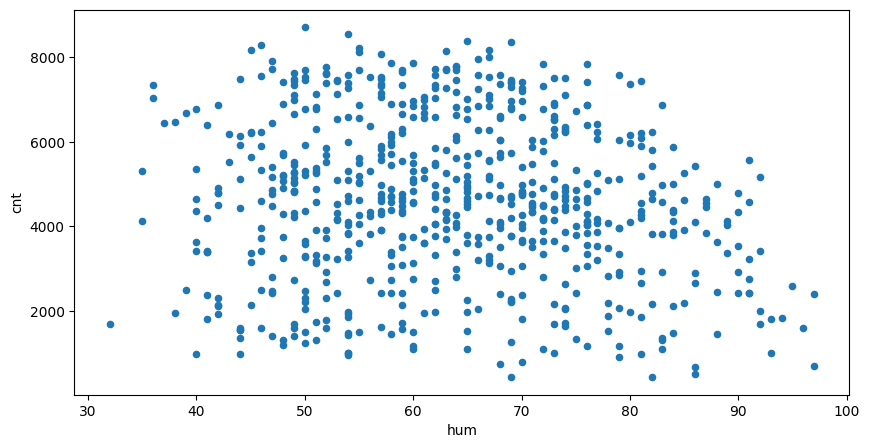

In [114]:
df1.plot(kind="scatter",marker='o',x='hum',y='cnt',figsize=(10,5))
plt.show()